<a href="https://colab.research.google.com/github/edmanft/DL_quantum_metrology/blob/main/Drug_pair_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating DataFrames for good and badly predicted drugs

We are going to check for differences in drug pairs that are highly predictable or that are not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


We import our dataset and the DatFrame with the Pearson score of the drug pairs. drug_comb_commutative has the training set commutative but not the test set. 

In [4]:
path = "/content/drive/MyDrive/archivos_tfm/drug_comb_commutative.csv"

df_drug_comb = pd.read_csv(path, index_col = 0)

In [5]:
df_drug_comb.columns

Index(['Cell line name', 'Compound A', 'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 'H A', 'Einf A', 'IC50 B', 'H B', 'Einf B',
       'Synergy score', 'QA', 'Combination ID', 'Challenge', 'Dataset'],
      dtype='object')

In [6]:
drug_pair_pc = pd.read_csv("/content/drive/MyDrive/archivos_tfm/Drug_comb_Pearson_test_set.csv", index_col = 0)

In [7]:
drug_pair_pc

,Combination ID,n_cl,Pearson coefficient
66,ATR_4.HDAC_4,3,0.997464
51,PIK3C.TNFSF10,3,0.996200
5,FGFR.WNT,3,0.979861
105,AKT_1.PIK3C_2,7,0.976761
114,ERBB.PIK3CA_4,6,0.970435
...,...,...,...
154,JAK.MTOR,3,-0.772861
108,IAP.Oxaliplatin,3,-0.823394
58,Gemcitabine.PARP1,3,-0.933260
137,AKT.TNF,3,-0.993527


In [8]:
good_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] >= 0.5]
good_drugs

,Combination ID,n_cl,Pearson coefficient
66,ATR_4.HDAC_4,3,0.997464
51,PIK3C.TNFSF10,3,0.996200
5,FGFR.WNT,3,0.979861
105,AKT_1.PIK3C_2,7,0.976761
114,ERBB.PIK3CA_4,6,0.970435
...,...,...,...
65,ADAM17.FGFR,6,0.525121
104,EGFR.MAP2K_1,7,0.510107
26,PIK3C_2.PIK3CA_4,7,0.507870
148,Cisplatin.HDAC_4,3,0.507698


In [9]:
bad_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] <= 0]
bad_drugs

,Combination ID,n_cl,Pearson coefficient
39,ATR_4.CarboTaxol,9,-0.012520
80,ALK.CSNK2A1_2,6,-0.025167
70,MAP2K_1.PIP5K1,6,-0.036671
31,ESR1.FGFR,7,-0.040706
147,ADAM17.PIK3CB_PIK3CD,8,-0.063901
127,AKT.Chloroquine,5,-0.065215
144,AKT.PIP5K1,6,-0.079268
73,ESR1.MAP2K_1,7,-0.125420
129,FGFR.TNKS_PARP6,7,-0.125491
13,ATR_4.IAP,9,-0.126814


Now we want to create DataFrames of monotherapy information of the drugs that yield synergy to later check the p values of each feature and see if the null hypothesis is true.

In [10]:
test_df = df_drug_comb[df_drug_comb['Dataset'] == "test"]

In [11]:
test_df

,Cell line name,Compound A,Compound B,Max. conc. A,Max. conc. B,IC50 A,H A,Einf A,IC50 B,H B,Einf B,Synergy score,QA,Combination ID,Challenge,Dataset
2790,CAMA-1,AKT,ADAM17,1.00,75.0,0.126186,0.993706,3.688533,1.000000,0.000000,100.000000,-6.972573,1,ADAM17.AKT,ch1,test
2791,HCC1395,AKT,ADAM17,1.00,75.0,0.910569,0.552451,0.000000,10.905410,0.239641,82.740876,-2.669625,1,ADAM17.AKT,ch1,test
2792,Hs-578-T,AKT,ADAM17,1.00,75.0,1.000000,0.258989,17.701706,0.540880,4.851464,73.495692,11.609180,1,ADAM17.AKT,ch1,test
2793,MDA-MB-157,AKT,ADAM17,1.00,75.0,1.000000,0.215696,5.095356,0.010219,0.227937,52.121460,37.900300,1,ADAM17.AKT,ch1,test
2794,MDA-MB-468,AKT,ADAM17,1.00,75.0,0.509420,0.941494,26.827759,7.328496,10.000000,94.799897,29.504740,1,ADAM17.AKT,ch1,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,Calu-6,Vinorelbine,BCL2_2,0.03,3.0,0.015602,2.583210,36.854102,1.000000,0.000000,100.000000,12.384880,1,BCL2_2.Vinorelbine,ch1,test
3875,NCI-H1563,Vinorelbine,BCL2_2,0.03,3.0,0.030000,0.110001,29.776107,0.000300,0.100000,88.601043,-115.750900,1,BCL2_2.Vinorelbine,ch1,test
3876,NCI-H2085,Vinorelbine,BCL2_2,3.00,3.0,0.003088,0.241204,28.470279,1.000000,0.000000,100.000000,-8.649973,1,BCL2_2.Vinorelbine,ch1,test
3877,NCI-H23,Vinorelbine,BCL2_2,0.10,3.0,0.030085,10.000000,15.199403,1.000000,0.000000,100.000000,31.952940,1,BCL2_2.Vinorelbine,ch1,test


In [12]:
valid_xs_perm = pd.DataFrame()
valid_xs_perm[['Cell line name', 'Compound A', 
               'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 
       'H A', 'Einf A', 
       'IC50 B', 'H B', 'Einf B',
       'Synergy score', 'QA', 
       'Combination ID', 'Challenge', 'Dataset']] = test_df[['Cell line name', 'Compound B', 
               'Compound A', 'Max. conc. B',
       'Max. conc. A', 'IC50 B', 
       'H B', 'Einf B', 
       'IC50 A', 'H A', 'Einf A','Synergy score', 'QA', 
       'Combination ID', 'Challenge', 'Dataset']]

      

In [13]:
commutative_df = pd.concat([test_df, valid_xs_perm])
commutative_df

,Cell line name,Compound A,Compound B,Max. conc. A,Max. conc. B,IC50 A,H A,Einf A,IC50 B,H B,Einf B,Synergy score,QA,Combination ID,Challenge,Dataset
2790,CAMA-1,AKT,ADAM17,1.0,75.00,0.126186,0.993706,3.688533,1.000000,0.000000,100.000000,-6.972573,1,ADAM17.AKT,ch1,test
2791,HCC1395,AKT,ADAM17,1.0,75.00,0.910569,0.552451,0.000000,10.905410,0.239641,82.740876,-2.669625,1,ADAM17.AKT,ch1,test
2792,Hs-578-T,AKT,ADAM17,1.0,75.00,1.000000,0.258989,17.701706,0.540880,4.851464,73.495692,11.609180,1,ADAM17.AKT,ch1,test
2793,MDA-MB-157,AKT,ADAM17,1.0,75.00,1.000000,0.215696,5.095356,0.010219,0.227937,52.121460,37.900300,1,ADAM17.AKT,ch1,test
2794,MDA-MB-468,AKT,ADAM17,1.0,75.00,0.509420,0.941494,26.827759,7.328496,10.000000,94.799897,29.504740,1,ADAM17.AKT,ch1,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,Calu-6,BCL2_2,Vinorelbine,3.0,0.03,1.000000,0.000000,100.000000,0.015602,2.583210,36.854102,12.384880,1,BCL2_2.Vinorelbine,ch1,test
3875,NCI-H1563,BCL2_2,Vinorelbine,3.0,0.03,0.000300,0.100000,88.601043,0.030000,0.110001,29.776107,-115.750900,1,BCL2_2.Vinorelbine,ch1,test
3876,NCI-H2085,BCL2_2,Vinorelbine,3.0,3.00,1.000000,0.000000,100.000000,0.003088,0.241204,28.470279,-8.649973,1,BCL2_2.Vinorelbine,ch1,test
3877,NCI-H23,BCL2_2,Vinorelbine,3.0,0.10,1.000000,0.000000,100.000000,0.030085,10.000000,15.199403,31.952940,1,BCL2_2.Vinorelbine,ch1,test


Now we have our commutative test set which has account for the fact that the drug pair AB is the same as BA. Now we only have to check for the p values of the features of drug A for example. mono_df is conmutative

In [14]:
mono_df = commutative_df[['Max. conc. A','IC50 A', 'H A', 'Einf A','Combination ID']]
mono_df


,Max. conc. A,IC50 A,H A,Einf A,Combination ID
2790,1.0,0.126186,0.993706,3.688533,ADAM17.AKT
2791,1.0,0.910569,0.552451,0.000000,ADAM17.AKT
2792,1.0,1.000000,0.258989,17.701706,ADAM17.AKT
2793,1.0,1.000000,0.215696,5.095356,ADAM17.AKT
2794,1.0,0.509420,0.941494,26.827759,ADAM17.AKT
...,...,...,...,...,...
3874,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine
3875,3.0,0.000300,0.100000,88.601043,BCL2_2.Vinorelbine
3876,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine
3877,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine


In [15]:
good_drugs_mono = mono_df[mono_df["Combination ID"].isin(good_drugs["Combination ID"])]
good_drugs_mono

,Max. conc. A,IC50 A,H A,Einf A,Combination ID
2803,1.0,0.923744,1.373009,71.773827,ADAM17.FGFR
2804,1.0,1.000000,0.328447,80.731294,ADAM17.FGFR
2805,1.0,1.000000,0.698847,67.497304,ADAM17.FGFR
2806,1.0,1.000000,0.000000,100.000000,ADAM17.FGFR
2807,1.0,1.000000,0.000000,100.000000,ADAM17.FGFR
...,...,...,...,...,...
3874,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine
3875,3.0,0.000300,0.100000,88.601043,BCL2_2.Vinorelbine
3876,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine
3877,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine


In [16]:
bad_drugs_mono = mono_df[mono_df["Combination ID"].isin(bad_drugs["Combination ID"])]
bad_drugs_mono

,Max. conc. A,IC50 A,H A,Einf A,Combination ID
2828,1.0,0.103440,1.490744,82.067345,ADAM17.PIK3CB_PIK3CD
2829,1.0,0.122968,1.344596,21.794504,ADAM17.PIK3CB_PIK3CD
2830,1.0,0.314345,10.000000,78.199758,ADAM17.PIK3CB_PIK3CD
2831,1.0,1.000000,0.370484,49.711168,ADAM17.PIK3CB_PIK3CD
2832,1.0,0.133586,1.007607,0.000000,ADAM17.PIK3CB_PIK3CD
...,...,...,...,...,...
3835,1.0,0.112054,2.776323,83.239297,FGFR.TNKS_PARP6
3836,1.0,1.000000,0.000000,100.000000,FGFR.TNKS_PARP6
3837,1.0,1.000000,2.998191,81.804207,FGFR.TNKS_PARP6
3838,1.0,1.000000,0.000000,100.000000,FGFR.TNKS_PARP6


# Analysis of good and bad drugs

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7ff180fe6d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff180ff0dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff180f7ae10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff180f7a8d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff180ff0350>,
  <matplotlib.lines.Line2D at 0x7ff180f82f50>]}

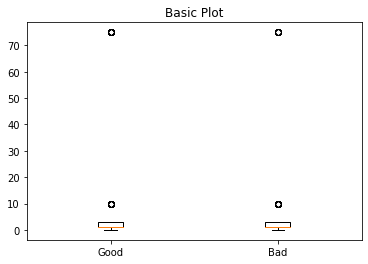

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
data = [good_drugs_mono["Max. conc. A"],bad_drugs_mono["Max. conc. A"]]
labels = ["Good","Bad"]
ax1.boxplot(data, labels =labels)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

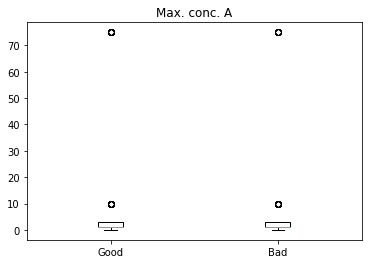

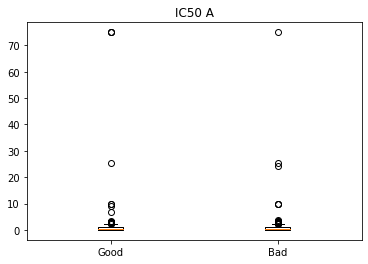

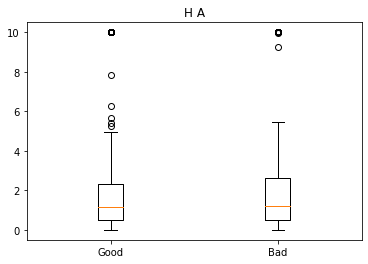

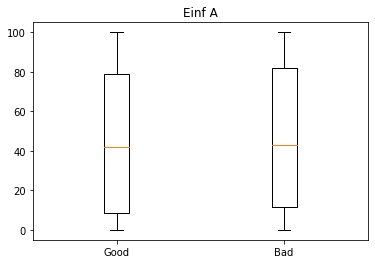

In [19]:
def boxplot_feature(feature, good_drugs_mono, bad_drugs_mono):
  fig1, ax1 = plt.subplots()
  ax1.set_title(feature)
  data = [good_drugs_mono[feature],bad_drugs_mono[feature]]
  labels = ["Good","Bad"]
  ax1.boxplot(data, labels =labels)

for feature in ['Max. conc. A', 'IC50 A', 'H A', 'Einf A']:
  boxplot_feature(feature, good_drugs_mono, bad_drugs_mono)

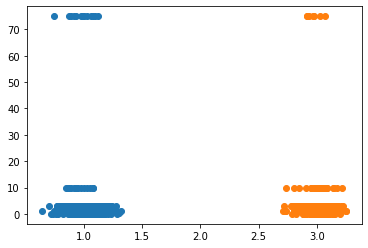

In [20]:
feature = 'Max. conc. A'
xA, xB = np.random.normal(1, 0.1, len(good_drugs_mono[feature])), np.random.normal(3, 0.1, len(bad_drugs_mono[feature]))

plt.scatter(xA, good_drugs_mono[feature])
plt.scatter(xB, bad_drugs_mono[feature])
plt.show()

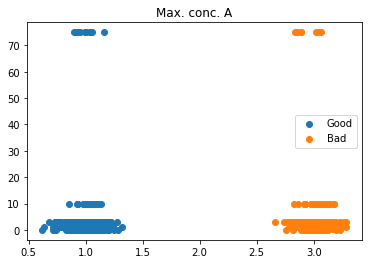

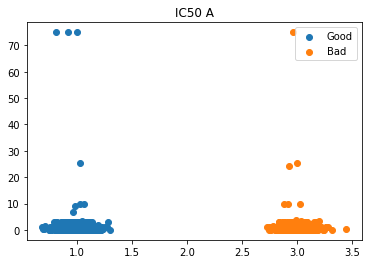

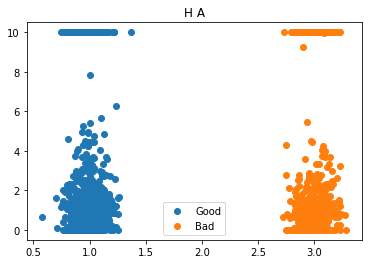

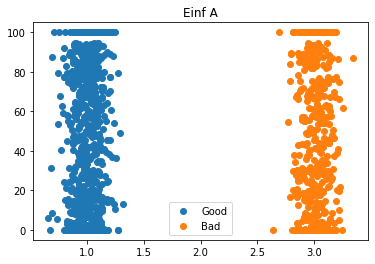

In [22]:
def scatterplot_feature(feature, good_drugs_mono, bad_drugs_mono):
  xA, xB = np.random.normal(1, 0.1, len(good_drugs_mono[feature])), np.random.normal(3, 0.1, len(bad_drugs_mono[feature]))

  plt.scatter(xA, good_drugs_mono[feature])
  plt.scatter(xB, bad_drugs_mono[feature])
  plt.legend(["Good", "Bad"])
  plt.title(feature)
  plt.show()

for feature in ['Max. conc. A', 'IC50 A', 'H A', 'Einf A']:
  scatterplot_feature(feature, good_drugs_mono, bad_drugs_mono)

# Automating thresholds

In [26]:
"up_thres is the threshold for highly predictable drugs"
"low_thres for the lowly predictable drugs" 
def good_bad_split(drug_pair_pc, up_thres, low_thres):
  good_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] >= up_thres]
  bad_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] <= low_thres]
  good_drugs_mono = mono_df[mono_df["Combination ID"].isin(good_drugs["Combination ID"])]
  bad_drugs_mono = mono_df[mono_df["Combination ID"].isin(bad_drugs["Combination ID"])]

  return good_drugs_mono, bad_drugs_mono

good_drugs_mono, bad_drugs_mono = good_bad_split(drug_pair_pc, up_thres = 0.9, low_thres = -0.8)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

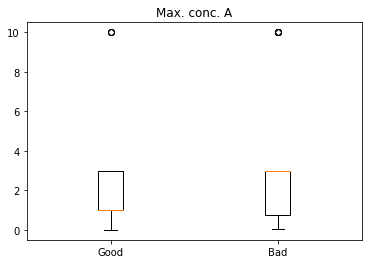

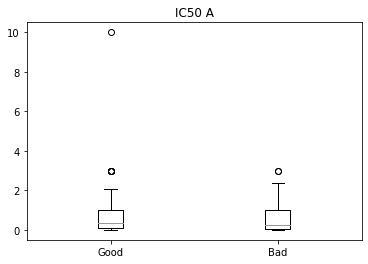

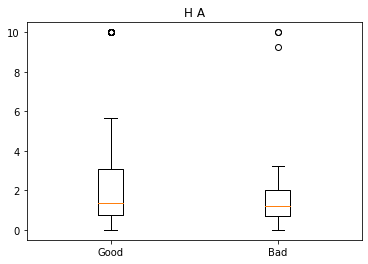

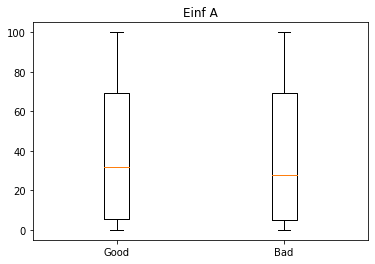

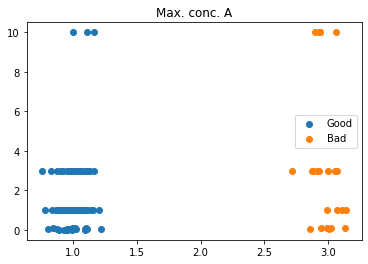

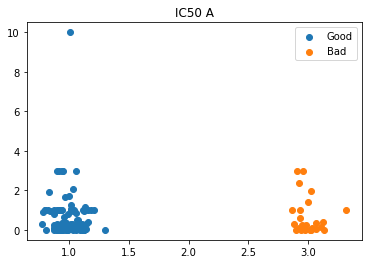

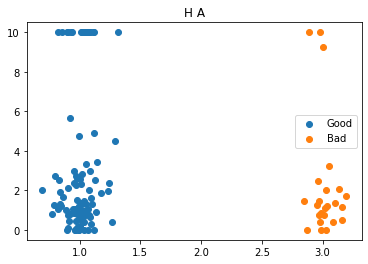

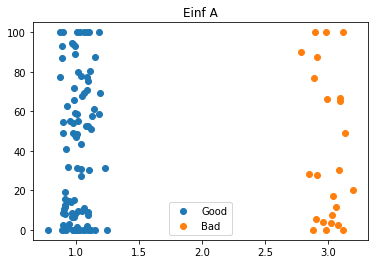

In [27]:

for feature in ['Max. conc. A', 'IC50 A', 'H A', 'Einf A']:
  
  boxplot_feature(feature, good_drugs_mono, bad_drugs_mono)
plt.show() 
for feature in ['Max. conc. A', 'IC50 A', 'H A', 'Einf A']:
  scatterplot_feature(feature, good_drugs_mono, bad_drugs_mono)

We don't see much difference after playing with the threshold, meaning that it is not only a matter of monotherapy features, of each drugs, interaction has to be taken into account.

# Checking abs(diff)
We were unable to see significant differences between the values of monotherapy features of good and bad predicted drugs. We will now try with more complex features such as the absolute value of the difference of each monotherapy value between the drug pair and its mean.

For that matter we have now to create a diff_df and av_df that are not commutative, because we don't want to overcount.

In [29]:
test_df.columns

Index(['Cell line name', 'Compound A', 'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 'H A', 'Einf A', 'IC50 B', 'H B', 'Einf B',
       'Synergy score', 'QA', 'Combination ID', 'Challenge', 'Dataset'],
      dtype='object')

In [34]:
diff_df = pd.DataFrame()
diff_df["diff_Max conc"] = np.abs(test_df['Max. conc. A'] -test_df['Max. conc. B'] )
diff_df["diff_IC50"] = np.abs(test_df['IC50 A'] -test_df['IC50 B'] )
diff_df["diff_'H"] = np.abs(test_df['H A'] -test_df['H B'] )
diff_df["diff_Einf"] = np.abs(test_df['Einf A'] -test_df['Einf B'] )
diff_df['Combination ID'] = test_df['Combination ID']

We modify good_bad_split so that we can generalize for every DataFrame of feautres

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

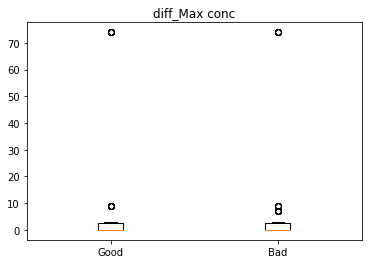

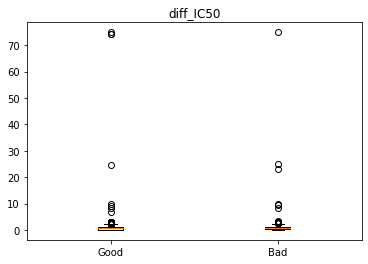

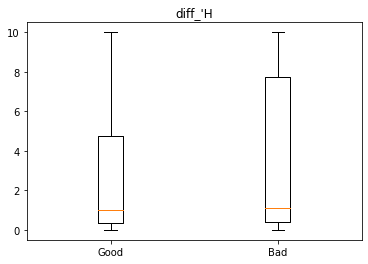

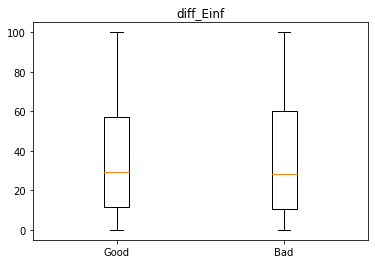

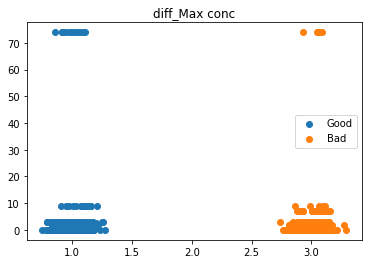

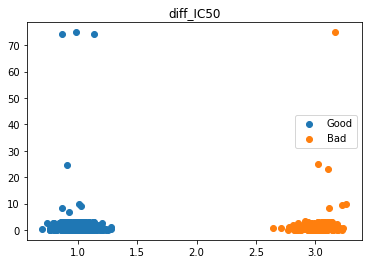

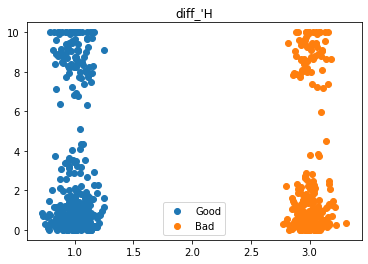

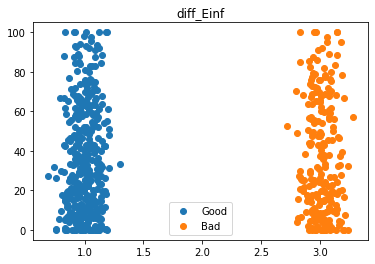

In [39]:
"up_thres is the threshold for highly predictable drugs"
"low_thres for the lowly predictable drugs" 

def good_bad_split(drug_pair_pc, up_thres, low_thres, feature_df):
  good_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] >= up_thres]
  bad_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] <= low_thres]
  good_drugs_feat = feature_df[feature_df["Combination ID"].isin(good_drugs["Combination ID"])]
  bad_drugs_feat = feature_df[feature_df["Combination ID"].isin(bad_drugs["Combination ID"])]

  return good_drugs_feat, bad_drugs_feat

good_drugs_diff, bad_drugs_diff = good_bad_split(drug_pair_pc,
                                                 up_thres = 0.5, 
                                                 low_thres = 0, 
                                                 feature_df = diff_df)

for feature in ["diff_Max conc", "diff_IC50", "diff_'H", "diff_Einf"]:
  
  boxplot_feature(feature, good_drugs_diff, bad_drugs_diff)
plt.show() 
for feature in ["diff_Max conc", "diff_IC50", "diff_'H", "diff_Einf"]:
  scatterplot_feature(feature, good_drugs_diff, bad_drugs_diff)

In [37]:
test_df.head(10)

,Cell line name,Compound A,Compound B,Max. conc. A,Max. conc. B,IC50 A,H A,Einf A,IC50 B,H B,Einf B,Synergy score,QA,Combination ID,Challenge,Dataset
2790,CAMA-1,AKT,ADAM17,1.0,75.0,0.126186,0.993706,3.688533,1.000000,0.000000,100.000000,-6.972573,1,ADAM17.AKT,ch1,test
2791,HCC1395,AKT,ADAM17,1.0,75.0,0.910569,0.552451,0.000000,10.905410,0.239641,82.740876,-2.669625,1,ADAM17.AKT,ch1,test
2792,Hs-578-T,AKT,ADAM17,1.0,75.0,1.000000,0.258989,17.701706,0.540880,4.851464,73.495692,11.609180,1,ADAM17.AKT,ch1,test
2793,MDA-MB-157,AKT,ADAM17,1.0,75.0,1.000000,0.215696,5.095356,0.010219,0.227937,52.121460,37.900300,1,ADAM17.AKT,ch1,test
2794,MDA-MB-468,AKT,ADAM17,1.0,75.0,0.509420,0.941494,26.827759,7.328496,10.000000,94.799897,29.504740,1,ADAM17.AKT,ch1,test
2795,MFM-223,AKT,ADAM17,1.0,75.0,0.226297,1.952148,17.477798,1.000000,0.000000,100.000000,38.850700,1,ADAM17.AKT,ch1,test
2796,CAL-120,BCL2_BCL2L1,ADAM17,1.0,75.0,0.094510,1.532679,44.192363,1.000000,0.000000,100.000000,-29.224590,1,ADAM17.BCL2_BCL2L1,ch1,test
2797,CAL-51,BCL2_BCL2L1,ADAM17,1.0,75.0,1.000000,0.528524,75.608577,75.000000,0.543599,83.527073,6.826433,1,ADAM17.BCL2_BCL2L1,ch1,test
2798,HCC1187,BCL2_BCL2L1,ADAM17,1.0,75.0,1.000000,0.000000,100.000000,75.000000,10.000000,7.400386,-21.932110,1,ADAM17.BCL2_BCL2L1,ch1,test
2799,HCC1428,BCL2_BCL2L1,ADAM17,1.0,75.0,0.107897,1.263608,9.386941,1.000000,0.000000,100.000000,4.883253,1,ADAM17.BCL2_BCL2L1,ch1,test


In [38]:
diff_df.head(10)

,diff_Max conc,diff_IC50,diff_'H,diff_Einf,Combination ID
2790,74.0,0.873814,0.993706,96.311467,ADAM17.AKT
2791,74.0,9.994841,0.312809,82.740876,ADAM17.AKT
2792,74.0,0.459120,4.592476,55.793987,ADAM17.AKT
2793,74.0,0.989781,0.012240,47.026104,ADAM17.AKT
2794,74.0,6.819075,9.058506,67.972138,ADAM17.AKT
2795,74.0,0.773703,1.952148,82.522202,ADAM17.AKT
2796,74.0,0.905490,1.532679,55.807637,ADAM17.BCL2_BCL2L1
2797,74.0,74.000000,0.015076,7.918496,ADAM17.BCL2_BCL2L1
2798,74.0,74.000000,10.000000,92.599614,ADAM17.BCL2_BCL2L1
2799,74.0,0.892103,1.263608,90.613059,ADAM17.BCL2_BCL2L1


We don't see anything, again.
We try averages next:

In [41]:
av_df = pd.DataFrame()
av_df["av_Max conc"] = (test_df['Max. conc. A'] +test_df['Max. conc. B'])/2
av_df["av_IC50"] = (test_df['IC50 A'] +test_df['IC50 B'] )/2
av_df["av_'H"] = (test_df['H A'] +test_df['H B'] )/2
av_df["av_Einf"] = (test_df['Einf A'] +test_df['Einf B'] )/2
av_df['Combination ID'] = test_df['Combination ID']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

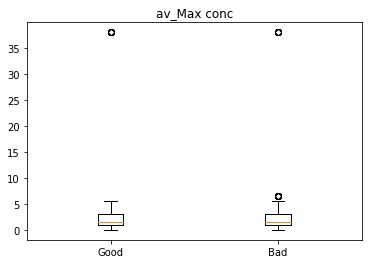

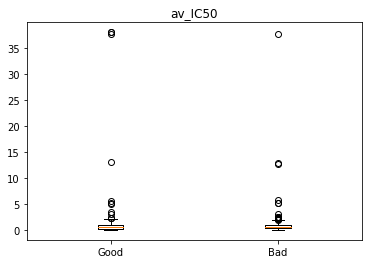

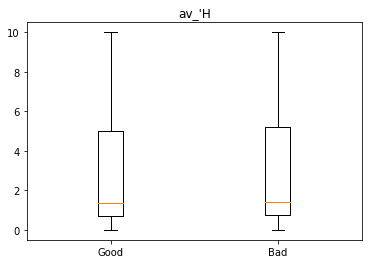

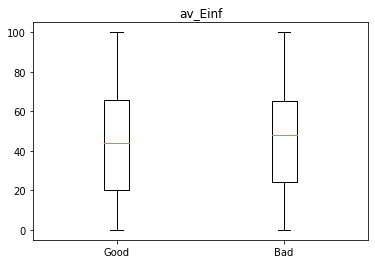

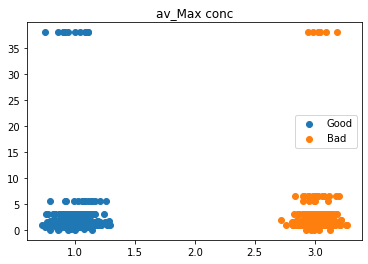

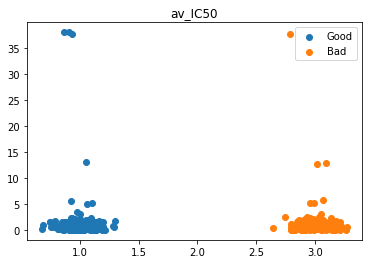

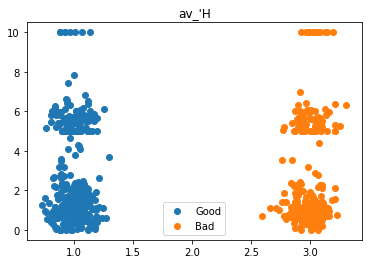

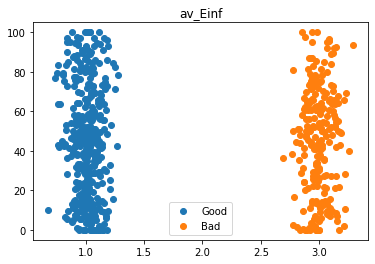

In [43]:
"up_thres is the threshold for highly predictable drugs"
"low_thres for the lowly predictable drugs" 

def good_bad_split(drug_pair_pc, up_thres, low_thres, feature_df):
  good_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] >= up_thres]
  bad_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] <= low_thres]
  good_drugs_feat = feature_df[feature_df["Combination ID"].isin(good_drugs["Combination ID"])]
  bad_drugs_feat = feature_df[feature_df["Combination ID"].isin(bad_drugs["Combination ID"])]

  return good_drugs_feat, bad_drugs_feat

good_drugs_av, bad_drugs_av = good_bad_split(drug_pair_pc,
                                                 up_thres = 0.5, 
                                                 low_thres = 0, 
                                                 feature_df = av_df)

for feature in ["av_Max conc", "av_IC50", "av_'H", "av_Einf"]:
  
  boxplot_feature(feature, good_drugs_av, bad_drugs_av)
plt.show() 
for feature in ["av_Max conc", "av_IC50", "av_'H", "av_Einf"]:
  scatterplot_feature(feature, good_drugs_av, bad_drugs_av)